### <b>EV Market Segmentation Analysis</b>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


#### <b>Customer Data Segmentation</b>

In [2]:
df = pd.read_csv('EV_customer_data.csv')
df.head()

,Gender,Age,Yearly Income,Environment_friendly,Cost_Savings,Performance,Own_EV _Vehicle,Usage_Of_PCS
0,Male,24 years - 30 years,Less than 5 lakhs,Strongly agree,Strongly agree,Strongly agree,Yes,Yes
1,Female,31 years - 37 years,5 lakhs - 10 lakhs,Agree,Agree,Agree,Yes,Yes
2,Male,38 years - 44 years,10 lakhs - 15 lakhs,Strongly agree,Strongly agree,Strongly agree,Yes,Yes
3,Male,45 years and above,Less than 5 lakhs,Agree,Agree,Agree,Yes,Yes
4,Female,24 years - 30 years,5 lakhs - 10 lakhs,Neutral,Neutral,Neutral,Yes,Yes


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1123 entries, 0 to 1122
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Gender                1123 non-null   object
 1   Age                   1123 non-null   object
 2   Yearly Income         1123 non-null   object
 3   Environment_friendly  1123 non-null   object
 4   Cost_Savings          1123 non-null   object
 5   Performance           1123 non-null   object
 6   Own_EV _Vehicle       1123 non-null   object
 7   Usage_Of_PCS          1123 non-null   object
dtypes: object(8)
memory usage: 70.3+ KB


#### Checking for null values

In [4]:
df.isnull().sum()


Gender                  0
Age                     0
Yearly Income           0
Environment_friendly    0
Cost_Savings            0
Performance             0
Own_EV _Vehicle         0
Usage_Of_PCS            0
dtype: int64

#### Visualizations on Customer data

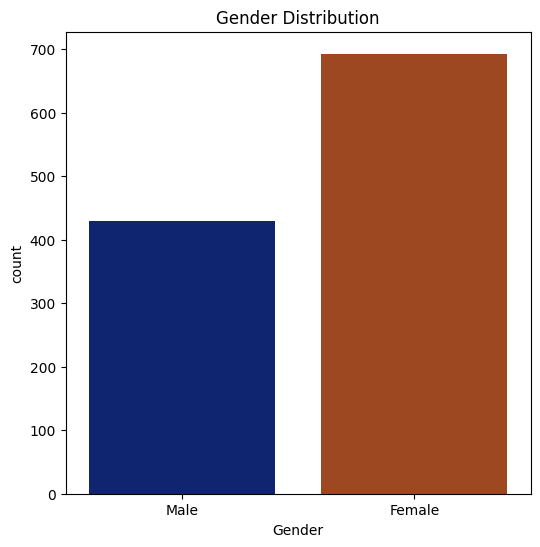

In [5]:
# Gender distribution
plt.figure(figsize=(6,6))
sns.countplot(data=df, x='Gender', hue='Gender', legend=False, palette='dark')
plt.title('Gender Distribution')
plt.show()


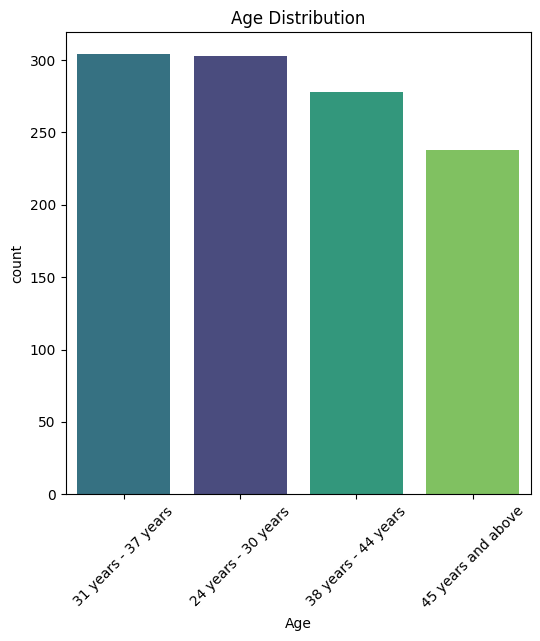

In [6]:
# Age distribution
plt.figure(figsize=(6,6))
sns.countplot(data=df, x='Age', palette='viridis', hue='Age', legend=False, order=df['Age'].value_counts().index)
plt.title('Age Distribution')
plt.xticks(rotation=45)
plt.show()


#### Income VS EV Ownership

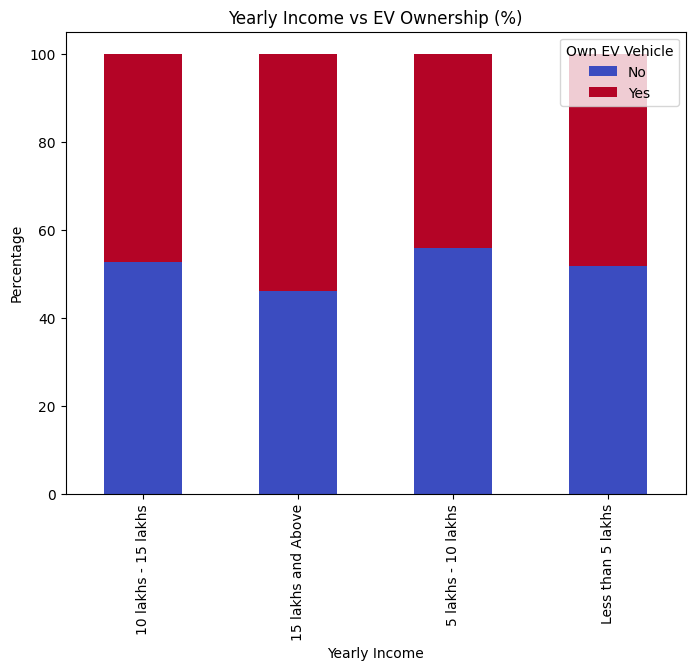

In [7]:
# Group data by Income and EV Ownership
income_ev = df.groupby('Yearly Income')['Own_EV _Vehicle'].value_counts(normalize=True).unstack() * 100

income_ev.plot(kind='bar', stacked=True, figsize=(8, 6), colormap='coolwarm')
plt.title('Yearly Income vs EV Ownership (%)')
plt.ylabel('Percentage')
plt.xlabel('Yearly Income')
plt.legend(title='Own EV Vehicle')
plt.show()

#### Environmentally Friendly and EV Ownership

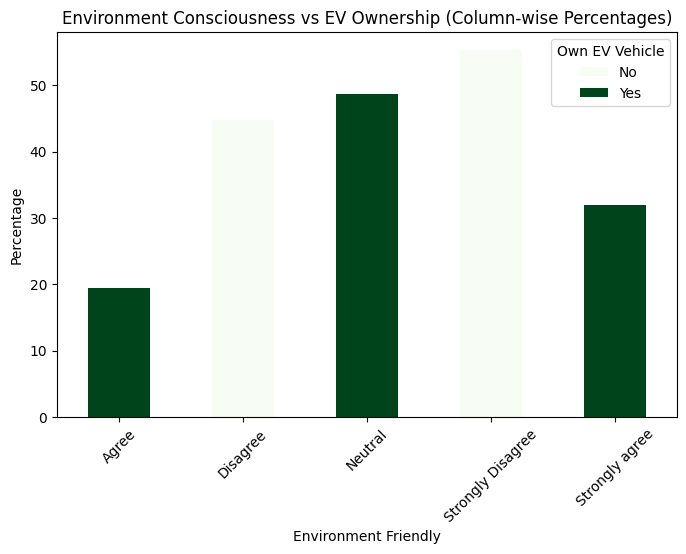

In [8]:
# Crosstab with column-wise normalization
env_ev_col_norm = pd.crosstab(df['Environment_friendly'], df['Own_EV _Vehicle'], normalize='columns') * 100

env_ev_col_norm.plot(kind='bar', stacked=True, figsize=(8, 5), colormap='Greens')
plt.title('Environment Consciousness vs EV Ownership (Column-wise Percentages)')
plt.ylabel('Percentage')
plt.xlabel('Environment Friendly')
plt.xticks(rotation=45)
plt.legend(title='Own EV Vehicle')
plt.show()


#### Usage of Public Charging Station 

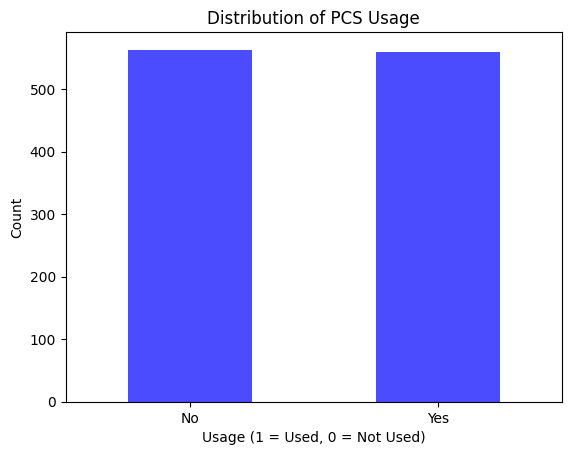

In [9]:
# Plot PCS Usage Distribution
df['Usage_Of_PCS'].value_counts().plot(kind='bar', color='blue', alpha=0.7)
plt.title('Distribution of PCS Usage')
plt.xlabel('Usage (1 = Used, 0 = Not Used)')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

####  Segmentation Analysis using Clustering

In [10]:
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans

# Encode categorical columns
encoder = LabelEncoder()
for col in ['Gender', 'Age', 'Yearly Income', 'Environment_friendly', 'Cost_Savings', 'Performance', 'Own_EV _Vehicle', 'Usage_Of_PCS']:
    df[col] = encoder.fit_transform(df[col])


df.head()

,Gender,Age,Yearly Income,Environment_friendly,Cost_Savings,Performance,Own_EV _Vehicle,Usage_Of_PCS
0,1,0,3,4,4,4,1,1
1,0,1,2,0,0,0,1,1
2,1,2,0,4,4,4,1,1
3,1,3,3,0,0,0,1,1
4,0,0,2,2,2,2,1,1


In [11]:
# Select relevant columns for clustering
features = df[['Age','Yearly Income', 'Environment_friendly', 'Cost_Savings', 'Performance']]

print(features)

      Age  Yearly Income  Environment_friendly  Cost_Savings  Performance
0       0              3                     4             4            4
1       1              2                     0             0            0
2       2              0                     4             4            4
3       3              3                     0             0            0
4       0              2                     2             2            2
...   ...            ...                   ...           ...          ...
1118    1              2                     4             4            4
1119    1              0                     0             0            0
1120    1              1                     3             3            3
1121    1              1                     4             4            4
1122    1              3                     4             4            4

[1123 rows x 5 columns]


#### Normalization

In [12]:
# Normalize the selected features

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

#### K-Means Clustering

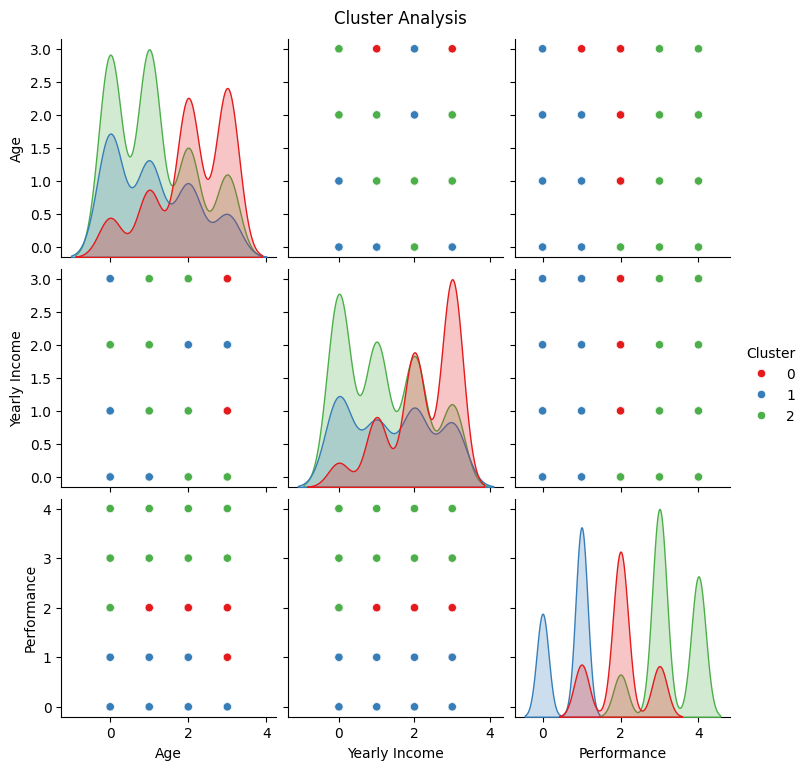

In [13]:
# Apply K-Means
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(features_scaled)

# Visualize the clusters
sns.pairplot(df, vars=['Age', 'Yearly Income', 'Performance'], hue='Cluster', palette='Set1')
plt.suptitle('Cluster Analysis', y=1.02)
plt.show()


              Age  Yearly Income  Environment_friendly  Cost_Savings  \
Cluster                                                                
0        2.055233       2.206395              1.994186      1.994186   
1        1.104027       1.385906              0.647651      0.647651   
2        1.118503       1.185031              3.251559      3.251559   

         Performance  
Cluster               
0           1.994186  
1           0.647651  
2           3.251559  


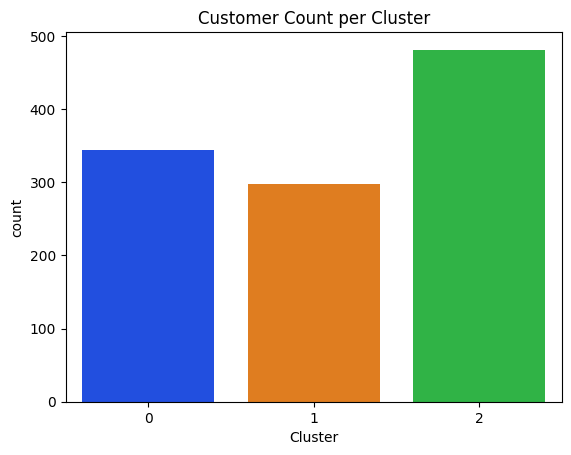

In [25]:
# Analyze the clusters
cluster_summary = df.groupby('Cluster')[['Age', 'Yearly Income', 'Environment_friendly', 'Cost_Savings', 'Performance']].mean()
print(cluster_summary)

# Count of customers in each cluster
sns.countplot(data=df, hue= 'Cluster', legend=False, x='Cluster', palette='bright')
plt.title('Customer Count per Cluster')
plt.show()


#### <b>Interpretation of the Clustering Solution</b>

The clustering results provide insights into three customer segments based on their Age, Yearly Income, Environment-Friendly Preferences, Cost Savings, and Performance Preferences. 

#### <b>Cluster Profiles</b>

<b>Cluster 0: Balanced Customers</b>

Age: Relatively older compared to other clusters (highest average age of 2.05).

Yearly Income: Moderate income (2.21 average).

Preferences: Balanced across environment-friendliness, cost savings, and performance (all around 2.0).

Insights:

These customers are likely middle-aged, financially stable, and value a mix of performance, environmental benefits, and cost-effectiveness.

<b>Target Product:</b> A mid-range EV offering a balance of features such as moderate pricing, decent range, and good performance.

<b>Cluster 1: Budget-Conscious, Low-Preference Customers</b>

Age: Younger (average age of 1.1, possibly representing late teens or early 20s).

Yearly Income: Low (1.39 average).

Preferences: Low across all metrics, particularly environment-friendliness, cost savings, and performance (all around 0.64).

Insights:

This group represents younger customers with limited financial means and lower interest in EV benefits.

<b>Target Product:</b> Entry-level, low-cost EVs with basic features to attract first-time buyers or those in urban areas with limited commutes.

Alternative Strategy: These customers may require more education on the benefits of EVs through marketing campaigns focused on affordability and savings.

<b>Cluster 2: Environmentally Conscious, High-Performance Seekers</b>

Age: Relatively young to middle-aged (average 1.11).

Yearly Income: Moderate income (1.18 average).

Preferences: High interest in environment-friendliness (3.25), cost savings (3.25), and performance (3.25).

Insights:

These are eco-conscious, performance-oriented customers who are willing to invest in EVs to align with their values and preferences.

<b>Target Product:</b> Premium EVs with advanced technology, high performance, and eco-friendly features, marketed as "green and powerful."


#### <b>Key Recommendations for the Startup</b>

Product Strategy: Develop three distinct product lines:

- Basic EVs for Cluster 1 (affordable and simple features).
- Mid-range EVs for Cluster 0 (balanced pricing and performance).
- Premium EVs for Cluster 2 (high-performance and eco-friendly focus).

Marketing Approach:

<b>For Cluster 1:</b> Highlight affordability, cost savings, and basic functionalities. Focus on urban, budget-conscious youth.

<b>For Cluster 0:</b> Emphasize value-for-money, reliability, and a balanced approach to performance and eco-friendliness.

<b>For Cluster 2:</b> Promote premium features, cutting-edge technology, and environmental impact to attract environmentally conscious, high-performance seekers.

Sales and Distribution:

Focus on urban areas for Clusters 1 and 2, where the younger population and eco-conscious customers are likely concentrated.
Expand into suburban or smaller cities for Cluster 0, where middle-aged, financially stable customers are located.

Education Campaigns:

Cluster 1 may need more education about EV benefits, so invest in marketing campaigns that promote cost savings, environmental benefits, and long-term value.

Infrastructure Support:

Collaborate with charging station providers to ensure adequate public charging infrastructure, particularly for Clusters 0 and 2, who value performance and usability.

#### <b>Data on Public Charging Station</b>

In [26]:
df1 = pd.read_csv('EV_PublicChargingStation.csv')
df1.head()

,Sl. No.,State/ UT,No. of PCS as on 31st March 2024
0,1,Andaman and Nicobar Islands,3
1,2,Andhra Pradesh,327
2,3,Arunachal Pradesh,9
3,4,Assam,86
4,5,Bihar,124


In [27]:
df1.rename(columns={"No. of PCS as on 31st March 2024": "No. of PCS"}, inplace=True)

# Display the updated column names
print(df1.columns)


Index(['Sl. No.', 'State/ UT', 'No. of PCS'], dtype='object')


In [28]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Sl. No.     35 non-null     object
 1   State/ UT   35 non-null     object
 2   No. of PCS  35 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 972.0+ bytes


In [29]:
df1.isnull().sum()

Sl. No.       0
State/ UT     0
No. of PCS    0
dtype: int64

#### Sorting the top states

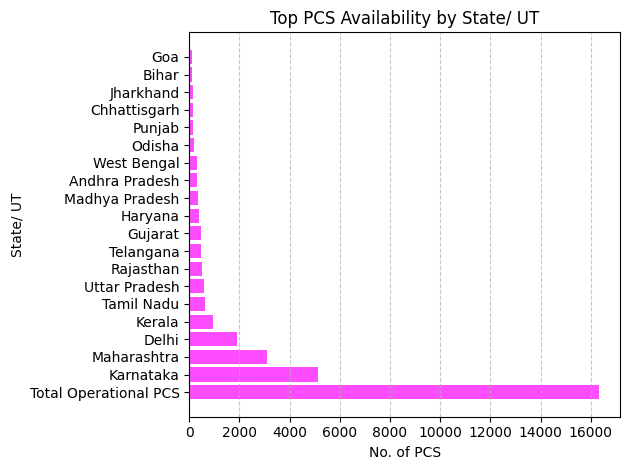

In [30]:
# Sort and filter the dataset 
df1 = df1.sort_values(by='No. of PCS', ascending=False)
df1_top = df1.head(20)  

# Create a horizontal bar chart for better readability
plt.barh(df1_top['State/ UT'], df1_top['No. of PCS'], color='magenta', alpha=0.7)

# Customize the plot
plt.title('Top PCS Availability by State/ UT')
plt.xlabel('No. of PCS')
plt.ylabel('State/ UT')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


#### <b>Key Insights</b>

The top 5 states in India with the highest number of operational Public Charging Stations (PCS) for electric vehicles as of March 31, 2024:

Karnataka: 5,130 PCS

Maharashtra: 3,083 PCS

Delhi: 1,886 PCS

Gujarat: 476 PCS

Haryana: 377 PCS

These states are leading the way in developing infrastructure to support the growing adoption of electric vehicles.This distribution highlights a significant push towards supporting electric vehicles in some regions, but also points to varying levels of infrastructure development across the country. It's an encouraging trend towards sustainable transportation!

#### <b>Data on EV Vehicle Registration VS Normal Vehicle Registration</b>

In [31]:
df2 = pd.read_csv('EV_Registration VS Normal.csv')
df2.head()

,Sl. No.,Vehicle Category,2018-Total,2018-EV,2018-%,2019-Total,2019-EV,2019-%,2020-Total,2020-EV,2020-%,2021-Total,2021-EV,2021-%,2022-Total,2022-EV,2022-%,2023-Total,2023-EV,2023-%
0,1,Two Wheeler,19576235,17067,0.09,18644700,30389,0.16,14305129,29113,0.20,13926217,156243,1.12,15592118,631181,4.05,9276337,489637,5.28
1,2,Three Wheeler,764806,110133,14.40,765867,133489,17.43,400893,90385,22.55,390820,158129,40.46,677034,350247,51.73,572654,300114,52.41
2,3,Four Wheeler,2999288,1047,0.03,2822782,962,0.03,2396428,3207,0.13,2945340,12259,0.42,3346973,33205,0.99,2020459,40186,1.99
3,4,Goods Vehicles,886047,658,0.07,799661,54,0.01,503358,15,0.00,602805,1118,0.19,804409,653,0.08,490920,1512,0.31
4,5,Public Service Vehicle,79317,50,0.06,81022,508,0.63,40328,88,0.22,15434,1177,7.63,45448,1972,4.34,47058,985,2.09


In [32]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Sl. No.           5 non-null      int64  
 1   Vehicle Category  5 non-null      object 
 2   2018-Total        5 non-null      int64  
 3   2018-EV           5 non-null      int64  
 4   2018-%            5 non-null      float64
 5   2019-Total        5 non-null      int64  
 6   2019-EV           5 non-null      int64  
 7   2019-%            5 non-null      float64
 8   2020-Total        5 non-null      int64  
 9   2020-EV           5 non-null      int64  
 10  2020-%            5 non-null      float64
 11  2021-Total        5 non-null      int64  
 12  2021-EV           5 non-null      int64  
 13  2021-%            5 non-null      float64
 14  2022-Total        5 non-null      int64  
 15  2022-EV           5 non-null      int64  
 16  2022-%            5 non-null      float64
 17  2

#### Reformatted the data for analysis

In [33]:
# Melt the DataFrame to long format
df_melted = pd.melt(
    df2,
    id_vars=["Sl. No.", "Vehicle Category"],
    var_name="Year-Metric",
    value_name="Value"
)

# Split the "Year-Metric" column into "Year" and "Metric"
df_melted[["Year", "Metric"]] = df_melted["Year-Metric"].str.split("-", expand=True)

# Rearrange columns
df_reformatted = df_melted[["Sl. No.", "Vehicle Category", "Year", "Metric", "Value"]]

# Display the reformatted DataFrame
print(df_reformatted)

    Sl. No.        Vehicle Category  Year Metric        Value
0         1             Two Wheeler  2018  Total  19576235.00
1         2           Three Wheeler  2018  Total    764806.00
2         3            Four Wheeler  2018  Total   2999288.00
3         4          Goods Vehicles  2018  Total    886047.00
4         5  Public Service Vehicle  2018  Total     79317.00
..      ...                     ...   ...    ...          ...
85        1             Two Wheeler  2023      %         5.28
86        2           Three Wheeler  2023      %        52.41
87        3            Four Wheeler  2023      %         1.99
88        4          Goods Vehicles  2023      %         0.31
89        5  Public Service Vehicle  2023      %         2.09

[90 rows x 5 columns]


In [34]:
df_reformatted.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Sl. No.           90 non-null     int64  
 1   Vehicle Category  90 non-null     object 
 2   Year              90 non-null     object 
 3   Metric            90 non-null     object 
 4   Value             90 non-null     float64
dtypes: float64(1), int64(1), object(3)
memory usage: 3.6+ KB


In [35]:
pivoted_df = df_reformatted.pivot(index=['Vehicle Category', 'Year'], columns='Metric', values='Value').reset_index()
pivoted_df.rename(columns={'Total': 'Total_Registrations', '%': 'EV_Penetration'}, inplace=True)
print(pivoted_df.head())


Metric Vehicle Category  Year  EV_Penetration       EV  Total_Registrations
0          Four Wheeler  2018            0.03   1047.0            2999288.0
1          Four Wheeler  2019            0.03    962.0            2822782.0
2          Four Wheeler  2020            0.13   3207.0            2396428.0
3          Four Wheeler  2021            0.42  12259.0            2945340.0
4          Four Wheeler  2022            0.99  33205.0            3346973.0


#### Year-over-Year Growth

In [36]:
pivoted_df['YoY_Growth'] = pivoted_df.groupby('Vehicle Category')['Total_Registrations'].pct_change() * 100


#### Category Segmentation:
Identify Categories with High EV Penetration

In [37]:
avg_ev_penetration = pivoted_df.groupby('Vehicle Category')['EV_Penetration'].mean().sort_values(ascending=False)
print(avg_ev_penetration)


Vehicle Category
Three Wheeler             33.163333
Public Service Vehicle     2.495000
Two Wheeler                1.816667
Four Wheeler               0.598333
Goods Vehicles             0.110000
Name: EV_Penetration, dtype: float64


#### Focus on Growing Segments:

Filter vehicle categories with significant EV penetration growth.

In [38]:
pivoted_df['EV_Penetration_Growth'] = pivoted_df.groupby('Vehicle Category')['EV_Penetration'].diff()
high_growth_categories = pivoted_df[pivoted_df['EV_Penetration_Growth'] > 0]
print(high_growth_categories)


Metric        Vehicle Category  Year  EV_Penetration        EV  \
2                 Four Wheeler  2020            0.13    3207.0   
3                 Four Wheeler  2021            0.42   12259.0   
4                 Four Wheeler  2022            0.99   33205.0   
5                 Four Wheeler  2023            1.99   40186.0   
9               Goods Vehicles  2021            0.19    1118.0   
11              Goods Vehicles  2023            0.31    1512.0   
13      Public Service Vehicle  2019            0.63     508.0   
15      Public Service Vehicle  2021            7.63    1177.0   
19               Three Wheeler  2019           17.43  133489.0   
20               Three Wheeler  2020           22.55   90385.0   
21               Three Wheeler  2021           40.46  158129.0   
22               Three Wheeler  2022           51.73  350247.0   
23               Three Wheeler  2023           52.41  300114.0   
25                 Two Wheeler  2019            0.16   30389.0   
26        

#### Market Share Analysis

EV market share for each vehicle category

In [39]:
total_ev_registrations = pivoted_df.groupby('Year')['Total_Registrations'].sum()
pivoted_df['Market_Share'] = (pivoted_df['Total_Registrations'] / pivoted_df['Total_Registrations'].sum()) * 100


#### Visualizations

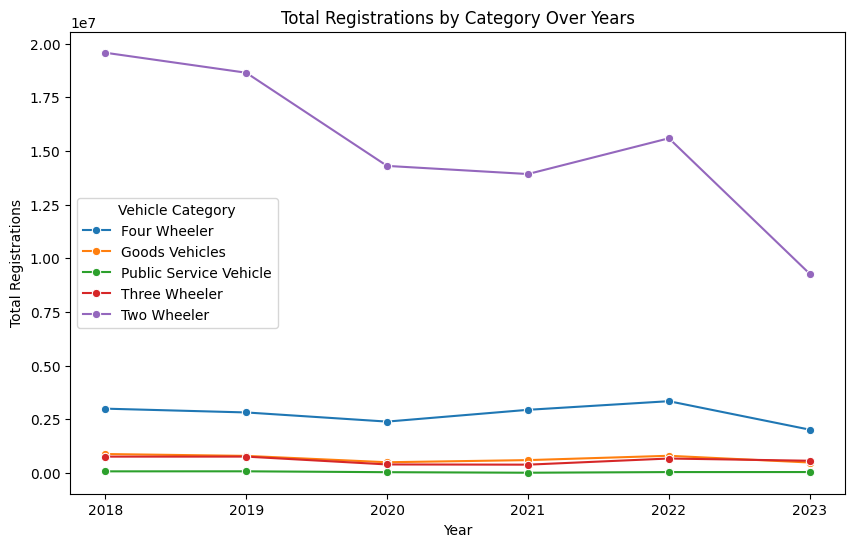

In [40]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=pivoted_df, x='Year', y='Total_Registrations', hue='Vehicle Category', marker='o')
plt.title('Total Registrations by Category Over Years')
plt.ylabel('Total Registrations')
plt.show()


#### EV Penetration by Category

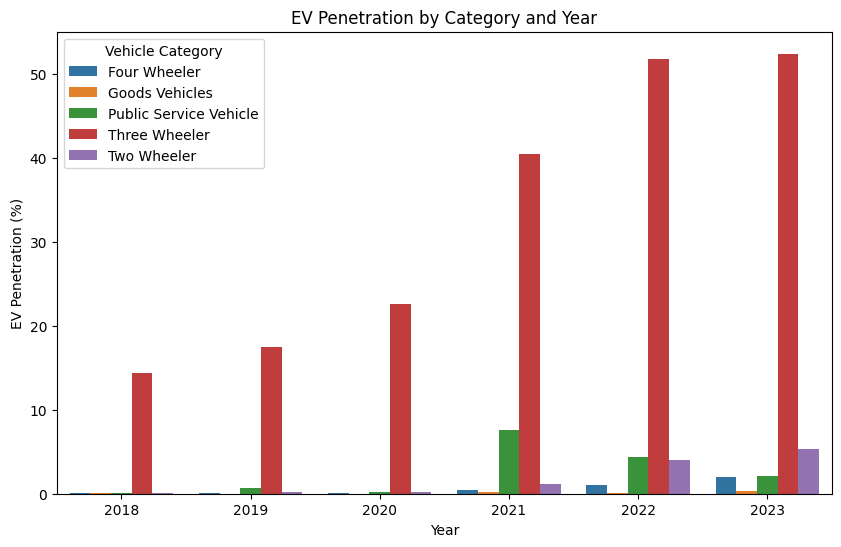

In [41]:
plt.figure(figsize=(10, 6))
sns.barplot(data=pivoted_df, x='Year', y='EV_Penetration', hue='Vehicle Category')
plt.title('EV Penetration by Category and Year')
plt.ylabel('EV Penetration (%)')
plt.show()


#### Heatmap: Growth Trends

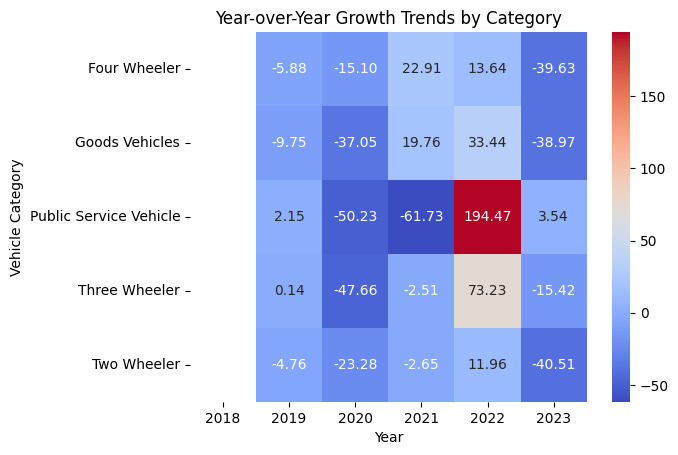

In [42]:
heatmap_data = pivoted_df.pivot(index='Vehicle Category', columns='Year', values='YoY_Growth')
sns.heatmap(heatmap_data, cmap='coolwarm', annot=True, fmt=".2f")
plt.title('Year-over-Year Growth Trends by Category')
plt.show()


#### <b>Interpretation of high_growth_categories</b>

The above output shows the vehicle categories and years where there was significant growth in EV penetration (EV_Penetration_Growth), accompanied by key metrics such as total registrations, year-over-year growth, and the number of EV registrations.

#### Key Observations by Category

<b>1.Four Wheeler</b>
Trend: EV penetration has consistently grown, starting at 0.13% in 2020 and reaching 1.99% in 2023.

Insights:
- EV adoption is relatively slow but steady in this segment.
- Significant penetration growth occurred in 2021 (+0.29%) and 2022 (+0.57%).
- The total registrations dropped sharply in 2023 (-39.63% YoY), but EV penetration grew, suggesting EVs are gaining market share even with lower overall demand.

<b>2.Goods Vehicles</b>
Trend: EV penetration increased from 0.19% in 2021 to 0.31% in 2023.

Insights:
- This segment shows low EV adoption.
- Slow penetration growth indicates significant barriers, such as the cost of EVs or inadequate charging infrastructure.

<b>3.Public Service Vehicles</b>
Trend: EV penetration surged from 0.63% in 2019 to 7.63% in 2021.

Insights:
- The sharp increase in 2021 suggests a shift toward EV adoption, possibly due to government incentives or mandates for public transport electrification.

<b>4.Three Wheeler</b>
Trend: EV penetration started at 17.43% in 2019 and reached 52.41% in 2023.

Insights:
- This category has the highest EV penetration, indicating strong adoption trends.
- Major growth years include 2021 (+17.91%) and 2022 (+11.27%), reflecting rapid EV adoption, likely driven by affordability, government subsidies, and demand for cost-efficient transportation.

<b>5.Two Wheeler</b>
Trend: EV penetration increased from 0.16% in 2019 to 5.28% in 2023.

Insights:
- Growth accelerated significantly in 2021 (+0.92%) and 2022 (+2.93%).
- Although penetration is lower than three-wheelers, the consistent growth signals a shift in consumer preferences.

#### <b>General Observations</b>

Highest Growth Segments:

- Three-wheelers show the highest EV penetration, growing to over 50% market share by 2023.
- Two-wheelers demonstrate rapid growth but still lag in penetration compared to three-wheelers.

Low Growth Segments:

- Goods vehicles and four-wheelers exhibit slower adoption rates. These segments may face barriers such as high costs and lack of suitable infrastructure.

Market Dynamics:

- Even with declining total registrations in categories like four-wheelers and two-wheelers in 2023, EV penetration is increasing, indicating a shift toward EVs over traditional vehicles.


#### <b>Data on Manufacturers By Place</b>

In [43]:
df4 = pd.read_csv('EV_Maker_Place.csv')
df4.head()

,EV Maker,Place,State
0,Tata Motors,Pune,Maharashtra
1,Mahindra Electric,Bengaluru,Karnataka
2,Ather Energy,Bengaluru,Karnataka
3,Hero Electric,New Delhi,Delhi
4,Ola Electric,Krishnagiri,Tamil Nadu


In [44]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   EV Maker  62 non-null     object
 1   Place     62 non-null     object
 2   State     62 non-null     object
dtypes: object(3)
memory usage: 1.6+ KB


#### Analyze and Aggregate Data

Count the number of EV manufacturers in each state.

In [45]:
# Group by State and count EV Makers
state_counts = df4.groupby("State")["EV Maker"].count().reset_index()
state_counts.rename(columns={"EV Maker": "Manufacturer_Count"}, inplace=True)

# Display aggregated data
print(state_counts)


             State  Manufacturer_Count
0   Andhra Pradesh                   1
1            Delhi                   4
2          Gujarat                   5
3          Haryana                   6
4        Karnataka                   6
5   Madhya Pradesh                   1
6      Maharashtra                  15
7           Punjab                   1
8        Rajasthan                   4
9       Tamil Nadu                  11
10       Telangana                   3
11     Uttarakhand                   2
12     West Bengal                   3


#### Visualizations

Bar Chart for Distribution by State

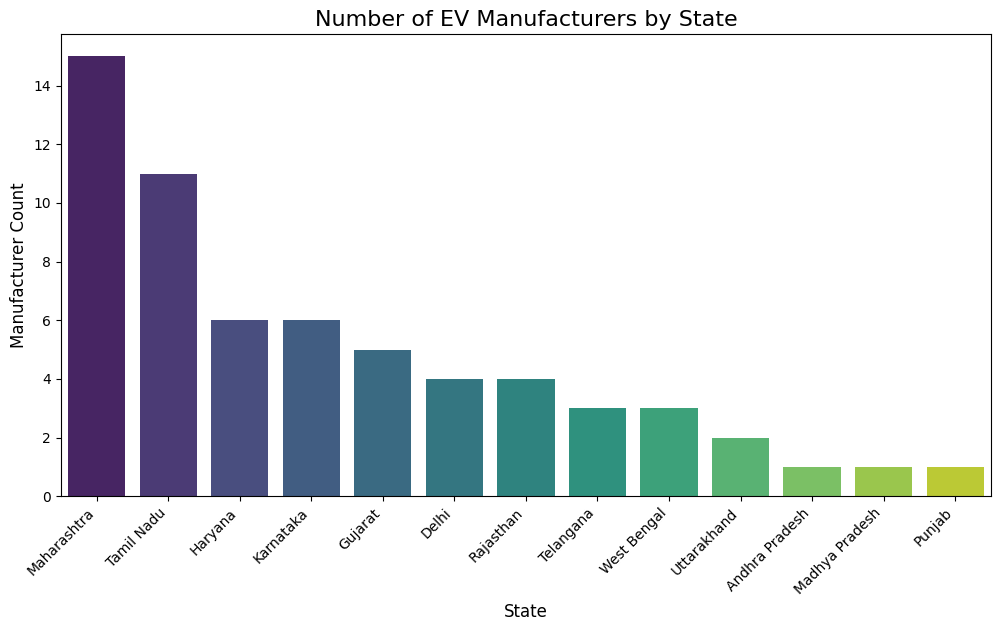

In [46]:
# Sort values for better visualization
state_counts = state_counts.sort_values(by="Manufacturer_Count", ascending=False)

# Bar Chart
plt.figure(figsize=(12, 6))
sns.barplot(data=state_counts, x="State",hue= 'State', legend= False, y="Manufacturer_Count", palette="viridis")
plt.title("Number of EV Manufacturers by State", fontsize=16)
plt.xlabel("State", fontsize=12)
plt.ylabel("Manufacturer Count", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.show()



#### Heatmap for Manufacturer Distribution

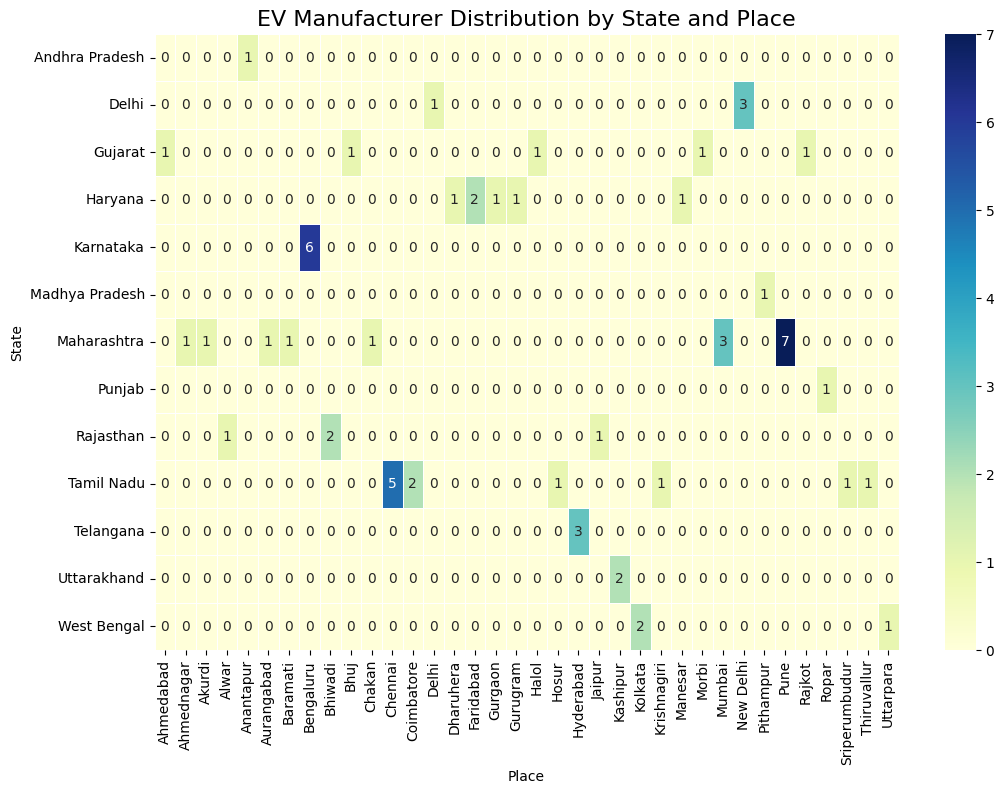

In [ ]:
# Create a pivot table for heatmap 
heatmap_data = df4.groupby(["State", "Place"]).size().unstack(fill_value=0)

# Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, cmap="YlGnBu", fmt="d", linewidths=.5)
plt.title("EV Manufacturer Distribution by State and Place", fontsize=16)
plt.show()


#### Bubble Chart to Represent Density

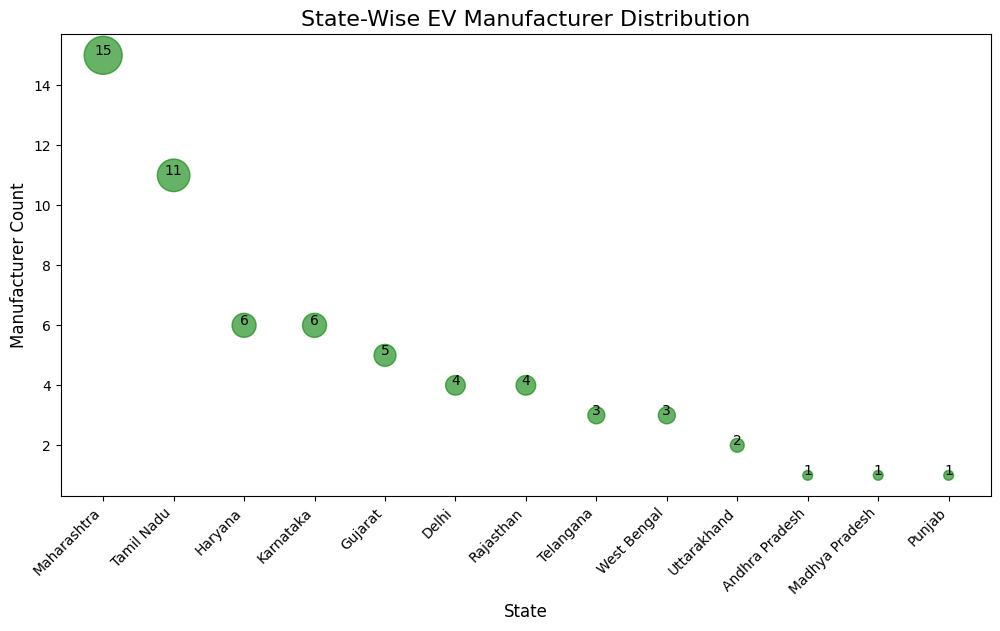

In [48]:
# Bubble Chart
plt.figure(figsize=(12, 6))
plt.scatter(state_counts["State"], state_counts["Manufacturer_Count"], 
            s=state_counts["Manufacturer_Count"] * 50, alpha=0.6, color="green")
for i in range(len(state_counts)):
    plt.text(state_counts["State"][i], state_counts["Manufacturer_Count"][i],
             state_counts["Manufacturer_Count"][i], ha="center")
plt.title("State-Wise EV Manufacturer Distribution", fontsize=16)
plt.xlabel("State", fontsize=12)
plt.ylabel("Manufacturer Count", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.show()


#### Percentage of manufacturers  state-wise

In [49]:
state_counts["Percentage"] = (state_counts["Manufacturer_Count"] / state_counts["Manufacturer_Count"].sum()) * 100
print(state_counts)


             State  Manufacturer_Count  Percentage
6      Maharashtra                  15   24.193548
9       Tamil Nadu                  11   17.741935
3          Haryana                   6    9.677419
4        Karnataka                   6    9.677419
2          Gujarat                   5    8.064516
1            Delhi                   4    6.451613
8        Rajasthan                   4    6.451613
10       Telangana                   3    4.838710
12     West Bengal                   3    4.838710
11     Uttarakhand                   2    3.225806
0   Andhra Pradesh                   1    1.612903
5   Madhya Pradesh                   1    1.612903
7           Punjab                   1    1.612903


#### Top states by number of manufacturers

In [50]:
# Top states by number of manufacturers
top_states = state_counts.nlargest(5, "Manufacturer_Count")
print("Top EV Manufacturing States:")
print(top_states)


Top EV Manufacturing States:
         State  Manufacturer_Count  Percentage
6  Maharashtra                  15   24.193548
9   Tamil Nadu                  11   17.741935
3      Haryana                   6    9.677419
4    Karnataka                   6    9.677419
2      Gujarat                   5    8.064516


#### <b>Key Insights</b>

- Maharashtra Leads: Maharashtra emerges as the top state with the highest number of EV manufacturers (15), contributing approximately 24.19% of the total.

- Tamil Nadu's Strong Presence: Tamil Nadu ranks second with 11 manufacturers, accounting for 17.74% of the total, showcasing its strong industrial ecosystem.

- Haryana and Karnataka: Both states share the third spot with 6 manufacturers each, representing 9.68% of the total.

- Gujarat's Contribution: Gujarat follows closely with 5 manufacturers, making up 8.06%, indicating its growing footprint in the EV manufacturing sector.

- Concentration in Few States: Together, these top five states contribute over 69% of all EV manufacturers, signifying regional hubs of industrial activity.

This data underscores the dominance of states like Maharashtra and Tamil Nadu while also highlighting emerging opportunities in other regions for growth and expansion in EV manufacturing.